# First-order all-pass filter

This is the first building block of a warped linear prediction filter.

Let's begin with its transfer function:

$$D(z) = \frac{z^{-1} - \lambda}{1 - \lambda z^{-1}}$$

By setting λ = 0, this reduces to a unit delay:

$$D(z) = z^{-1}$$

Unit delay means:
$$y[n] = D(z)x[n] \implies y[n] = x[n-1]$$

Let's observe this in practice.

In [1]:
import numpy, scipy, scipy.signal

b = [0, 1]
a = [1, 0]

w,h = scipy.signal.freqz(b, a)

`b` and `a` are the numerator and denominator coefficients of the filter's transfer function in terms of z<sup>-1</sup>, and are common arguments for filter-related functions in scipy (e.g. freqz, lfilter):

$$D(z) = z^{-1} = \frac{0z^{0} + 1z^{-1} + 0z^{-2} + ...}{1z^{0} - 0z^{-1} + 0z^{-2} + ...} \implies \frac{[0, 1]}{[1,0]}$$

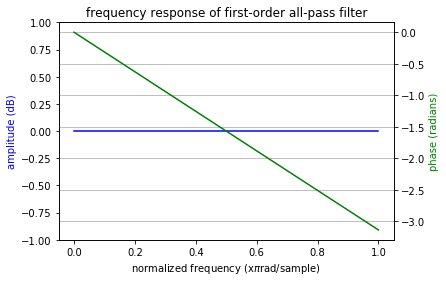

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title('frequency response of first-order all-pass filter')
ax1 = fig.add_subplot(111)
plt.plot(w/max(w), 20 * numpy.log10(abs(h)), 'b')
plt.ylim(-1, 1)
plt.ylabel('amplitude (dB)', color='b')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax2 = ax1.twinx()
angles = numpy.unwrap(numpy.angle(h))
plt.plot(w/max(w), angles, 'g')
plt.ylabel('phase (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

The flat frequency response is expected - an all-pass filter passes all frequencies equally. The phase response drops to -pi (-180°). What does that mean? Let's go back to the term mentioned earlier - unit delay, i.e.:

$$y[n] = D(z)x[n] \implies y[n] = x[n-1]$$

Given that the normalized Nyquist frequency is π radians/sample, and the above graph is in terms of normalized frequency, a delay of 1 sample, i.e. -1 sample, is equivalent to a -pi radian phase shift.

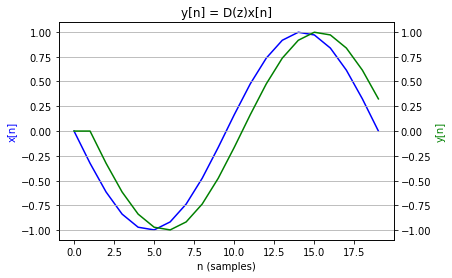

In [5]:
x = numpy.sin(numpy.linspace(-numpy.pi, numpy.pi, 20))
y = scipy.signal.lfilter(b, a, x)
samples = numpy.arange(max(len(x), len(y)))

fig = plt.figure()
plt.title('y[n] = D(z)x[n]')
ax1 = fig.add_subplot(111)
plt.plot(samples, x, 'b')
plt.ylabel('x[n]', color='b')
plt.xlabel('n (samples)')
ax2 = ax1.twinx()
plt.plot(samples, y, 'g')
plt.ylabel('y[n]', color='g')
plt.grid()
plt.axis('tight')
plt.show()

### References

